In [1]:
"""
Name: fd_spectrum.ipynb
Authors: Stephan Meighen-Berger
Testing ground for different light emission spectra
"""

'\nName: fd_spectrum.ipynb\nAuthors: Stephan Meighen-Berger\nTesting ground for different light emission spectra\n'

In [2]:
"""
Imports
"""
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma
from scipy.signal import peak_widths, find_peaks
from scipy.optimize import root
import logging
import warnings
from scipy.stats import gamma
import sys
sys.path.append("../core/")

In [3]:
# Latex text rendering
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

In [4]:
# Importing dob module
from fourth_day import FD
from fd_config import config

In [5]:
# Setting the debug level
# logging.basicConfig(level=logging.DEBUG)
# Turning off warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
fd = FD(org_filter='generous')

INFO: ---------------------------------------------------
INFO: ---------------------------------------------------
INFO: Welcome to FD!
INFO: This package will help you model deep sea bioluminescence!
INFO: ---------------------------------------------------
INFO: ---------------------------------------------------
INFO: Creating life...
INFO: Loading phyla according to config
INFO: Data extracted from Latz, M.I., Frank, T.M. & Case, J.F., Marine Biology 98 (1988)
INFO: Loading and parsing Proteobacteria_Gammaproteobacteria.txt
INFO: Loading and parsing Cnidaria_Scyphomedusae.txt
INFO: Loading and parsing Cnidaria_Hydrozoa.txt
INFO: Loading and parsing Cnidaria_Hydrozoa_Hydroidolina_Siphonophores_Calycophorae.txt
INFO: Loading and parsing Cnidaria_Hydrozoa_Hydroidolina_Siphonophores_Physonectae.txt
INFO: Creation finished
INFO: ---------------------------------------------------
INFO: ---------------------------------------------------
INFO: Initializing flood
INFO: Survivors collecte

In [6]:
std_size = 6.
fontsize = 20.
lw=3.

In [7]:
# Order of the populations
fd.keys

array(['Bathyctena sp. nov. Aa', 'Poralia sp.',
       'Periphyllopsis braueri Vanhoeffen', 'Lobata sp. nov. Aac',
       'Muggiaea sp.', 'Haeckelia beehleri (Mayer)',
       'Kiyohimea aurita Komai and Tokioka', 'Apolemia sp. 1',
       'Halicreas minimum Fewkes', 'Apolemia sp. 2',
       'Haeckelia rubra (Ko\xc3\x88lliker)', 'Obelia sp.',
       'Beroe ovata Bosc', 'Haliscera conica Vanhoeffen',
       'Pandea conica (Quoy and Gaimard)',
       'Beroe forskalii Milne Edwards', 'Nausithoe atlantica Broch',
       'Lobata sp. nov. Ba', 'Euplokamis sp.',
       'Photobacterium phosphoreum ANT-2200',
       'Mertensiidae gen. nov. A sp. nov. Aa',
       'Paraphyllina ransoni Russell', 'Leucothea pulchra (Matsumoto)',
       'Prayidae unidentified speciese', 'Frillagalma vityazi Daniel',
       'Mertensiidae gen. nov. B sp. nov. Ca', 'Bargmannia sp. nov.a',
       'Aulacoctena acuminata Mortensen',
       'Nectadamas diomedeae (Bigelow)',
       'Halistemma amphytridis (Lesueur and Petit)

In [8]:
# Weighting them
pdf_spl = fd.smith.fd_smithing(population=np.random.rand(len(fd.smith.keys), 1))

C:\Users\steph\Anaconda2\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


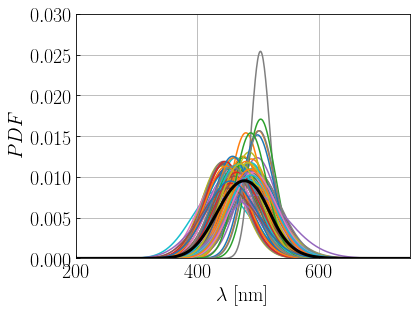

In [9]:
# Energy distributions
figure, ax = plt.subplots(figsize=(std_size, std_size * 6. / 8.))
for key in fd.keys:
    ax.plot(config['pdf_grid'], fd.pdfs[key])
ax.plot(config['pdf_grid'], pdf_spl(config['pdf_grid']), lw=lw, color='k')
ax.set_xlim(200., 750)
ax.set_ylim(0., 0.03)
ax.set_xscale('linear')
ax.set_yscale('linear')
ax.set_xlabel(r'$\lambda\;[\mathrm{nm}]$', fontsize=fontsize)
ax.set_ylabel(r'$PDF$', fontsize=fontsize)
ax.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
plt.grid(True)
plt.show()